### Plotting fed funds tick data in a short time frame to measure the impact of economic variables on the fed funds rate (In progress)
- Reference file is the Reuters economic release file

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import AutoDateLocator
import matplotlib.dates as mdates
from datetime import timedelta

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
filePath = r'C:\Users\Keavan\Jupyter\Economics'
fileNameFedFunds = filePath + r'\fed_funds\data\FFH0_tick.csv' #too many data points
fileNameEcon = filePath + r'\economic_data\eikon\economic_events.csv'

In [6]:
def funds_plot(start, end):
    
    ff = pd.read_csv(fileNameFedFunds, header = 0)
    econ = pd.read_csv(fileNameEcon, header = 0)

    ff = ff.set_index('Date')
    ff.index =  pd.to_datetime(ff.index, infer_datetime_format=True)
    econ['Date'] =  pd.to_datetime(econ['Date'], infer_datetime_format=True)

    today = datetime.datetime.today().strftime('%Y-%m-%d')
    econ = econ[econ['Date'] <= today]

    start_plot = start
    end_plot = end

    mask = (ff.index >= start_plot) & (ff.index <= end_plot)
    ff_plot = ff.loc[mask]
    
    
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.set_ylabel('Volume')
    ax.plot(ff_plot.index, ff_plot['VOLUME'], color='tab:red')
    
    ax2 = ax.twinx()
    
    ax2.set_ylabel('Fed Funds Futures (1M)')
    ax2.plot(ff_plot.index, ff_plot['VALUE'], color = 'blue')

    if datetime.datetime.strptime(end, format('%Y-%m-%d')) - datetime.datetime.strptime(start, format('%Y-%m-%d')) <= timedelta(days=4):
        
        hours = mdates.HourLocator(interval = 4)
        h_fmt = mdates.DateFormatter('%H:%M:%S')
        ax.xaxis.set_major_locator(hours)
        ax.xaxis.set_major_formatter(h_fmt)
    
    
    else:
        fig.autofmt_xdate()
    #fig.savefig(filePath + r'\fed_funds\pics\mar_exp_short')
    
    plt.title('Fed Funds Futures Rate and Volume')
    
    return plt.show()

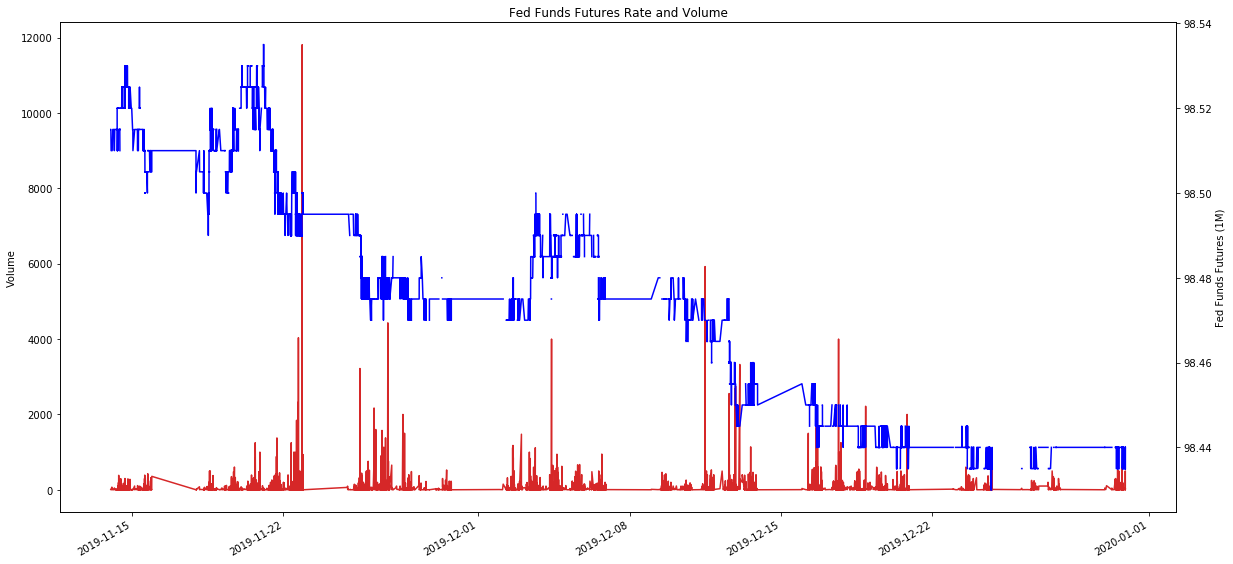

In [7]:
funds_plot('2019-11-14', '2019-12-31')

In [8]:
def funds_plot(start, end):
    
    ff = pd.read_csv(fileNameFedFunds, header = 0)
    econ = pd.read_csv(fileNameEcon, header = 0)

    ff = ff.set_index('Date')
    ff.index =  pd.to_datetime(ff.index, infer_datetime_format=True)
    econ['Date'] =  pd.to_datetime(econ['Date'], infer_datetime_format=True)

    today = datetime.datetime.today().strftime('%Y-%m-%d')
    econ = econ[econ['Date'] <= today]

    start_plot = start
    end_plot = end

    mask = (ff.index >= start_plot) & (ff.index <= end_plot)
    ff_plot = ff.loc[mask]
    
    
    fig, (ax1, ax5) = plt.subplots(2, 1, sharex = True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(20,10))
    
    ax1.set_ylabel('Volume')
    ax1.plot(ff_plot.index, ff_plot['VOLUME'], color='tab:red')
    
    ax2 = ax1.twinx() #clones existing axis and overlays plot
    
    ax2.set_ylabel('Fed Funds Futures (1M)')
    ax2.plot(ff_plot.index, ff_plot['VALUE'], color = 'blue')

    
    
    ax5.plot(ff_plot.index, ff_plot['VOLUME'], color='tab:red') #Add economic variable here
    
    
    
    
    if datetime.datetime.strptime(end, format('%Y-%m-%d')) - datetime.datetime.strptime(start, format('%Y-%m-%d')) <= timedelta(days=4):
        hours = mdates.HourLocator(interval = 4)
        h_fmt = mdates.DateFormatter('%H:%M:%S')
        ax.xaxis.set_major_locator(hours)
        ax.xaxis.set_major_formatter(h_fmt)
    
    else:
        fig.autofmt_xdate()
        
    plt.title('Fed Funds Futures')
    
    return plt.show()

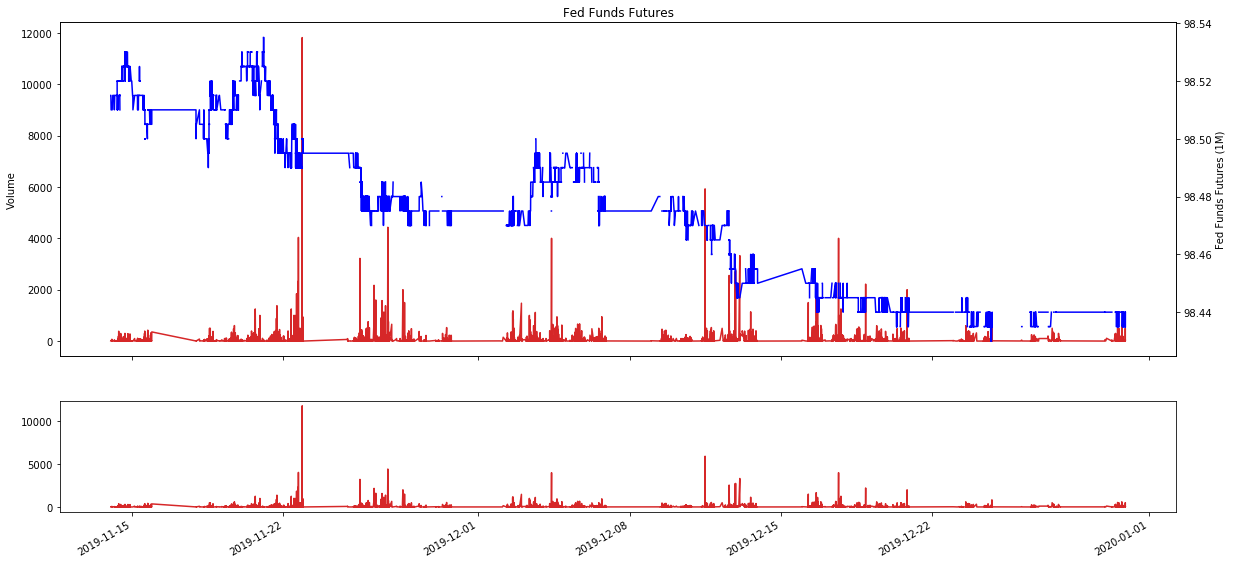

In [9]:
funds_plot('2019-11-14', '2019-12-31')

In [16]:
econ

,RIC,Date,Local Time,Country,Relevance,Type,Indicator Name,Period,Reuters Poll,Actual,Unit,Surprise,Prior,Revised,Min,Max,Count,SmartEstimate®,Predicted Surprise
0,USJOB=ECI,2019-11-14,8:30,United States,High,-1,Initial Jobless Claims,"4 Nov, w/e",215k,227k,Person,12.0k,211k,NaN,210k,220k,34.0,214.9k,-0.1k
1,USRSL=ECI,2019-11-15,8:30,United States,High,1,Retail Sales MM,Oct,0.20%,0.30%,Percent,0.10%,-0.40%,NaN,-0.20%,0.60%,64.0,0.19%,-0.01%
2,USIP=ECI,2019-11-15,9:15,United States,High,1,Industrial Production MM,Oct,-0.40%,-0.50%,Percent,-0.10%,-0.50%,NaN,-1.00%,0.30%,64.0,-0.48%,-0.08%
3,USHST=ECI,2019-11-19,8:30,United States,High,1,Housing Starts Number,Oct,1.320M,1.340M,Number of,0.0200M,1.266M,NaN,1.262M,1.409M,56.0,1.3132M,-0.0068M
4,USJOB=ECI,2019-11-21,8:30,United States,High,-1,Initial Jobless Claims,"11 Nov, w/e",219k,228k,Person,9.0k,227k,NaN,213k,225k,31.0,218.0k,-1.0k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,USNFAR=ECI,2020-02-07,8:30,United States,High,1,Non-Farm Payrolls,Jan,160k,225k,Person,65.0k,145k,147k,120k,200k,100.0,160.6k,0.6k
91,USUNR=ECI,2020-02-07,8:30,United States,High,1,Unemployment Rate,Jan,3.50%,3.60%,Percent,0.10%,3.50%,NaN,3.40%,3.60%,97.0,3.50%,0.00%
92,USAVHE=ECI,2020-02-07,8:30,United States,High,1,Average Earnings YY,Jan,3.00%,3.10%,Percent,0.10%,2.90%,3.00%,2.70%,3.20%,47.0,3.01%,0.01%
93,USCPI=ECI,2020-02-13,8:30,United States,High,1,"CPI MM, SA",Jan,0.20%,NaN,Percent,NaN,0.20%,NaN,-0.10%,0.20%,66.0,0.17%,-0.03%


In [15]:
ff = pd.read_csv(fileNameFedFunds, header = 0)
econ = pd.read_csv(fileNameEcon, header = 0)

ff = ff.set_index('Date')
ff.index =  pd.to_datetime(ff.index, infer_datetime_format=True)
econ['Date'] =  pd.to_datetime(econ['Date'], infer_datetime_format=True)

today = datetime.datetime.today().strftime('%Y-%m-%d')
econ = econ[econ['Date'] <= today]


In [ ]:




start_plot = '2019-11-14'
end_plot = '2019-11-25'

mask = (ff.index >= start_plot) & (ff.index <= end_plot)
ff_plot = ff.loc[mask]

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_ylabel('Fed Funds Futures (1M)')
ax.plot(ff_plot.index, ff_plot['VALUE'], color = 'blue')

ax2 = ax.twinx()
ax2.set_ylabel('Volume')
ax2.plot(ff_plot.index, ff_plot['VOLUME'], color='tab:red')

'''
hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
'''

fig.autofmt_xdate()

plt.show()

#fig.savefig(filePath + r'\fed_funds\pics\mar_exp_short')